# Applied Quantum Project 
By Joseph Anderson, Charlie Brady, Diarmuid Dignam and Ben Clark

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) General Example 
One base is used where the photons could be in two different qubit states - polarised vertically or horizontally.

### 1.1) No Eavesdropper

We consider Alice and Bob. Alice wants to send a message to Bob. Alice sends either vertically or horizontally polarized photons to Bob. Just after she sends them they go through a beam splitter which is in the vertical base. Bob also uses a beam splitter in the vertical base. So, vertically polarized photons from Alice go through to Bob but horizontal ones do not. Alice and Bob get the same results as shown - black squares meaning photon was measured, white ones mean it was blocked.  

In [2]:
def generate_q_states(num):
    # Generate a random sequence of quantum states (0 or 1) with size "num"
    return np.random.choice([0, 1], size=num)

In [9]:
def alice_prepare_states(num):
    # Alice makes a sequence of quantum states
    return generate_q_states(num)

In [10]:
def bob_measure_states(states, bases):
    # Bob measures the sequence of quantum states
    
    measurements = np.zeros_like(states)
    for i in range(len(states)):
        
        if bases[i] == 0:  # Measurement in standard basis
            measurements[i] = states[i]
            
        else:  # Measurement in complementary basis
            measurements[i] = states[i]

    return measurements

In [16]:
def simulate_system1(num):
    # Alice prepares a sequence of quantum states
    alice_states = alice_prepare_states(num)

    # Alice and Bob share bases information
    bases = generate_q_states(num)
    
    # Bob measures the quantum states
    bob_states = bob_measure_states(alice_states, bases)

    # Plot the states
    plt.figure(figsize=(10, 6))
    
    plt.subplot(3, 1, 1)
    plt.imshow([alice_states], cmap='gray', vmin=0, vmax=1)
    plt.title('Alice')

    plt.subplot(3, 1, 2)
    plt.imshow([bob_states], cmap='gray', vmin=0, vmax=1)
    plt.title('Bob')

    plt.tight_layout()
    plt.show()

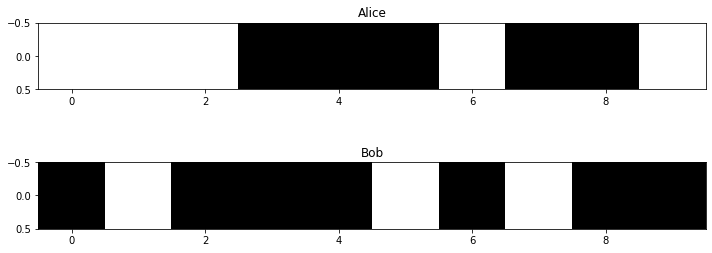

In [17]:
simulate_system1(num=10)

### 1.2) Eavesdropper Present Who Doesn't Know Correct Base

Next, we add an eavesdropper. The eavesdropper doesn’t know what base the photons are being sent with. So, he guesses a random orientation of his filter. However, because he doesn’t know the base, he doesn’t get the same as Alice. He also causes the polarization to change when he measures it through the collapse of the wavefunction. So, bob gets the wrong results as well. Bob knows there’s an eavesdropper. 

In [30]:
def bob_measure_states(states, bases):
    # Bob measures the sequence of quantum states
    
    measurements = np.zeros_like(states)
    for i in range(len(states)):
        
        if bases[i] == 0:  # Measurement in standard basis
            measurements[i] = states[i]
            
        else:  # Measurement in complementary basis
            measurements[i] = 1 - states[i]

    return measurements

In [31]:
def eavesdropper_intercept(states, bases):
    # Eavesdropper intercepts the sequence of quantum states and measures using its guess bases
    
    measurements = np.zeros_like(states)
    for i in range(len(states)):
        
        if bases[i] == 0:  # Measurement in standard basis
            measurements[i] = states[i]
            
        else:  # Measurement in complementary basis
            measurements[i] = 1 - states[i]

    return measurements

In [32]:
def simulate_system2(num):
    # Alice prepares a sequence of quantum states
    alice_states = alice_prepare_states(num)

    # Alice and Bob share bases information
    bases = generate_q_states(num)
    
    # Eavesdroper uses a random guess bases
    bases_eavesdropper = generate_q_states(num)

    # Eavesdropper intercepts and measures the quantum states
    eavesdropper_states = eavesdropper_intercept(alice_states, bases_eavesdropper)
    
    # Bob measures the quantum states
    bob_states = bob_measure_states(alice_states, bases)

    # Plot the states
    plt.figure(figsize=(10, 6))
    
    plt.subplot(3, 1, 1)
    plt.imshow([alice_states], cmap='gray', vmin=0, vmax=1)
    plt.title('Alice')
    
    plt.subplot(3, 1, 2)
    plt.imshow([eavesdropper_states], cmap='gray', vmin=0, vmax=1)
    plt.title('Eavesdropper')

    plt.subplot(3, 1, 3)
    plt.imshow([bob_states], cmap='gray', vmin=0, vmax=1)
    plt.title('Bob')

    plt.tight_layout()
    plt.show()

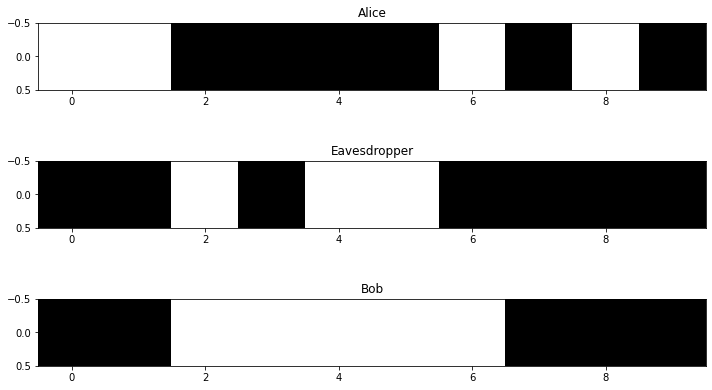

In [35]:
simulate_system2(num = 10)

### 1.3) Eavesdropper Guesses Correct Base

Now the eavesdropper tries lots of different bases until he finds the correct one. When he finds this bases Alice and Bob will still get the same result as the eavesdropper will now be outputting the correct polarization as well. Alice and Bob won’t know that the eavesdropper has listened. 

In [36]:
def bob_measure_states(states, bases):
    # Bob measures the sequence of quantum states
    
    measurements = np.zeros_like(states)
    for i in range(len(states)):
        
        if bases[i] == 0:  # Measurement in standard basis
            measurements[i] = states[i]
            
        else:  # Measurement in complementary basis
            measurements[i] = states[i]

    return measurements

In [37]:
def eavesdropper_intercept(states, bases):
    # Eavesdropper intercepts the sequence of quantum states and measures using its own bases
    
    measurements = np.zeros_like(states)
    for i in range(len(states)):
        
        if bases[i] == 0:  # Measurement in standard basis
            measurements[i] = states[i]
            
        else:  # Measurement in complementary basis
            measurements[i] = states[i]

    return measurements

In [41]:
def simulate_system3(num):
    # Alice prepares a sequence of quantum states
    alice_states = alice_prepare_states(num)

    # Alice and Bob share bases information
    bases = generate_q_states(num)

    # Eavesdropper intercepts and measures the quantum states
    eavesdropper_states = eavesdropper_intercept(alice_states, bases)
    
    # Bob measures the quantum states
    bob_states = bob_measure_states(eavesdropper_states, bases)

    # Visualize the states
    plt.figure(figsize=(10, 6))
    
    plt.subplot(3, 1, 1)
    plt.imshow([alice_states], cmap='gray', vmin=0, vmax=1)
    plt.title('Alice')
    
    plt.subplot(3, 1, 2)
    plt.imshow([eavesdropper_states], cmap='gray', vmin=0, vmax=1)
    plt.title('Eavesdropper')


    plt.subplot(3, 1, 3)
    plt.imshow([bob_states], cmap='gray', vmin=0, vmax=1)
    plt.title('Bob')
    
    plt.tight_layout()
    plt.show()

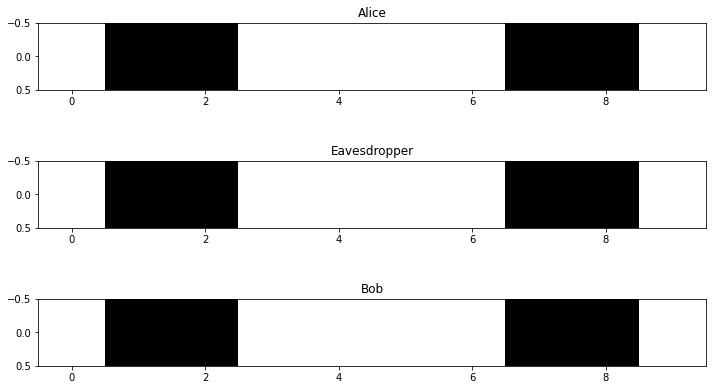

In [42]:
simulate_system3(num = 10)

## 2) Use BB84 Protocol

To avoid this, we can use the BB84 Protocol. Instead of previously only using 1 bases Alice now uses 2 different bases. So, there’s 4 different qubits: horizontal, vertical, diagonal and antidiagonal. Sometimes Alice transmits photons in the “horizontal/vertical” base and sometimes in the “diagonal/antidiagnonal” base. She continues to use a “horizontal/vertical” beamsplitter. Bob is also randomly changing his measuring bases without knowing what Alice is using. Bob compares the bases he used with that of Alice. Only the results where they have by chance used the same base can results be used. Red is where they don’t match. The identical data can be used as the key 

In [61]:
def generate_key(length):
    return [np.random.choice([0, 1]) for _ in range(length)]

In [62]:
def apply_basis(state, basis):
    if basis == 0:  # Horizontal/Vertical basis
        return state
    elif basis == 1:  # Diagonal/Anti-diagonal basis
        return [(state[0] + state[1]) % 2, (state[0] - state[1]) % 2]

In [68]:
def alice_send_photons(num):
    bases = generate_key(num)
    bits = generate_key(num)
    photons = [apply_basis([bits[i], 0], bases[i]) for i in range(num)]
    return photons, bases

In [69]:
def bob_measure_photons(photons, bases):
    measurements = [apply_basis(photons[i], bases[i]) for i in range(len(photons))]
    return measurements

In [70]:
def remove_unequal_bits(alice_bits, bob_bits):
    result = []
    for i in range(min(len(alice_bits), len(bob_bits))):
        if alice_bits[i] == bob_bits[i]:
            result.append((alice_bits[i], bob_bits[i]))
        else:
            result.append((7,7))
            # gives 7 when its a mismatch 
        
    return result

In [80]:
def simulate_system4(num):
    # Alice sends photons
    alice_photons, alice_bases = alice_send_photons(num)

    # Bob measures photons
    bob_bases = generate_key(num)
    bob_measurements = bob_measure_photons(alice_photons, bob_bases)

    # Alice and Bob share their bases for comparison
    shared_bits = remove_unequal_bits(alice_bases, bob_bases)

    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.imshow([alice_bases], cmap='gray', vmin=0, vmax=1)
    plt.title("Alice's Bits")

    plt.subplot(3, 1, 2)
    plt.imshow([bob_bases], cmap='gray', vmin=0, vmax=1)
    plt.title("Bob's Measured Bits")

    plt.subplot(3, 1, 3)
    plt.imshow([[bit[0] for bit in shared_bits]], cmap=plt.cm.colors.ListedColormap(['black', 'white', 'red']), 
               norm=plt.cm.colors.BoundaryNorm([0, 1, 2, 7], plt.cm.colors.ListedColormap(['black', 'white', 'red']).N), 
               aspect='auto')
    
    
    plt.title("Shared Bits")

    plt.tight_layout()
    plt.show()

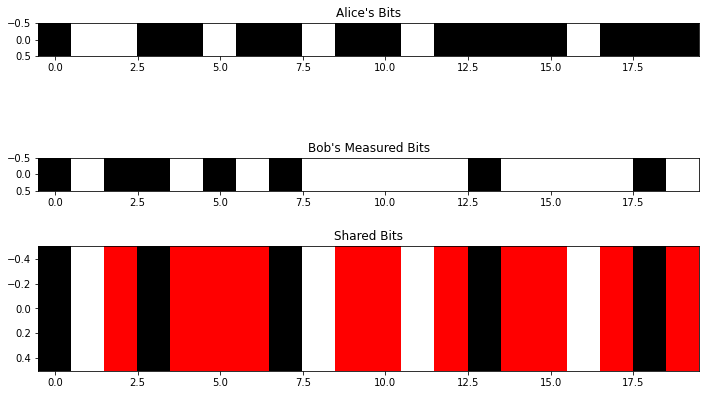

In [81]:
simulate_system4(num = 20)